In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 11:33:52,270] A new study created in memory with name: no-name-e07dbeba-7bac-4656-8826-20b9b4fa2c3f
[I 2025-04-27 11:34:00,432] Trial 0 finished with value: 0.9790078644888082 and parameters: {'n_estimators': 1144, 'max_depth': 8, 'learning_rate': 0.11487060436671832, 'subsample': 0.8745305735142711, 'colsample_bytree': 0.7755598007090252, 'gamma': 2.4825164639741732, 'reg_alpha': 0.034755519414574026, 'reg_lambda': 7.339193957099577e-08}. Best is trial 0 with value: 0.9790078644888082.
[I 2025-04-27 11:34:25,054] Trial 1 finished with value: 0.9583182093163944 and parameters: {'n_estimators': 3657, 'max_depth': 12, 'learning_rate': 0.03474107664412217, 'subsample': 0.9700732982919926, 'colsample_bytree': 0.86220564279303, 'gamma': 2.630413885537731, 'reg_alpha': 0.0030823073037713183, 'reg_lambda': 0.0003287614329849981}. Best is trial 0 with value: 0.9790078644888082.
[I 2025-04-27 11:35:27,008] Trial 2 finished with value: 0.9721113127646703 and parameters: {'n_estimat

Best trial:
Accuracy: 0.9861464004839686
Best hyperparameters:  {'n_estimators': 5838, 'max_depth': 14, 'learning_rate': 0.005326798212892049, 'subsample': 0.6686236082952349, 'colsample_bytree': 0.750096771021103, 'gamma': 2.3847511250384104, 'reg_alpha': 8.72963102204081e-05, 'reg_lambda': 8.207062240686798e-06}


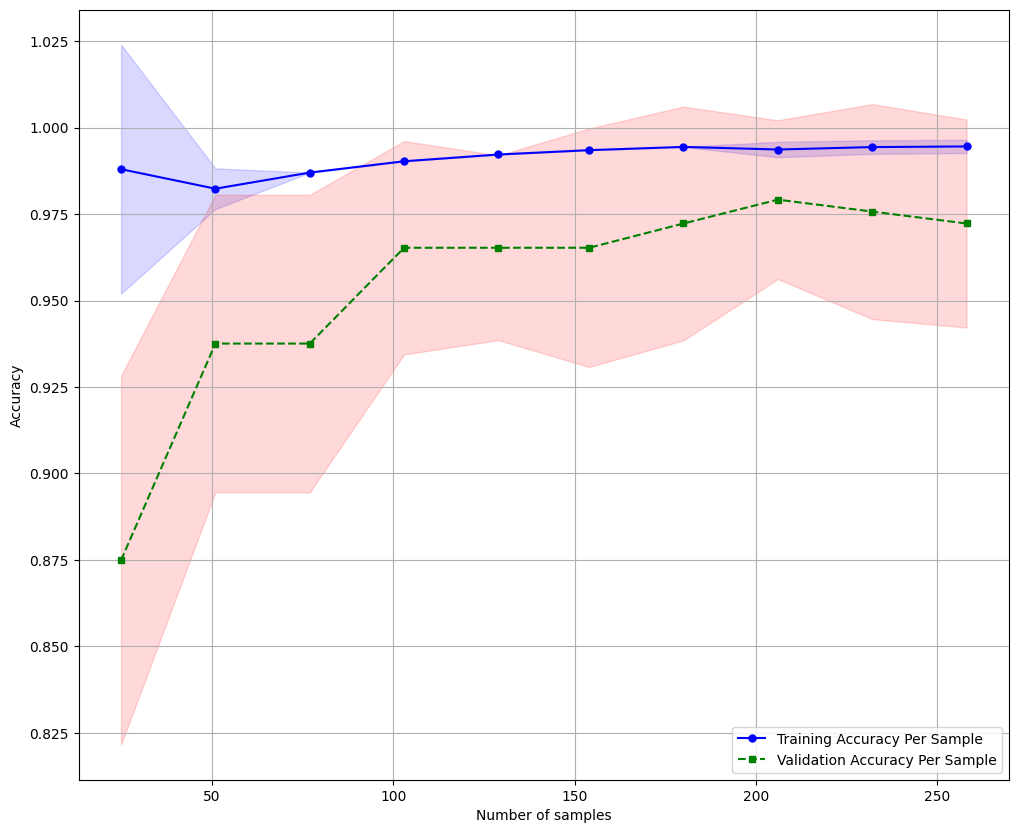

Confusion Matrix
[[ 58   6]
 [  2 105]]
Accuracy: 0.9532, Precision: 0.9459, Recall: 0.9813, F1: 0.9633, AUC: 0.9863


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

helper.train_and_evaluate_model('xgb', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)